In [ ]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Carga del DataFrame
df = pd.read_csv('drugs.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
# Selección de columnas objetivo
feature_cols = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

In [ ]:
# Separación de datos predictores y variable a predecir
x = df[feature_cols].values
y = df.Drug
x

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.516],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [23, 'M', 'LOW', 'HIGH', 7.298],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M', 'NORMAL', 'HIGH', 25.917],
       [47, 'M', 'LOW', 'NORMAL', 30.568],
       [48, 'F', 'LOW',

In [ ]:
# Codificación de variables categóricas
code_sex = LabelEncoder()
code_sex.fit(['M', 'F'])
x[:,1] = code_sex.transform(x[:,1])
x

array([[23, 0, 'HIGH', 'HIGH', 25.355],
       [47, 1, 'LOW', 'HIGH', 13.093],
       [47, 1, 'LOW', 'HIGH', 10.114],
       [28, 0, 'NORMAL', 'HIGH', 7.798],
       [61, 0, 'LOW', 'HIGH', 18.043],
       [22, 0, 'NORMAL', 'HIGH', 8.607],
       [49, 0, 'NORMAL', 'HIGH', 16.275],
       [41, 1, 'LOW', 'HIGH', 11.037],
       [60, 1, 'NORMAL', 'HIGH', 15.171],
       [43, 1, 'LOW', 'NORMAL', 19.368],
       [47, 0, 'LOW', 'HIGH', 11.767],
       [34, 0, 'HIGH', 'NORMAL', 19.199],
       [43, 1, 'LOW', 'HIGH', 15.376],
       [74, 0, 'LOW', 'HIGH', 20.942],
       [50, 0, 'NORMAL', 'HIGH', 12.703],
       [16, 0, 'HIGH', 'NORMAL', 15.516],
       [69, 1, 'LOW', 'NORMAL', 11.455],
       [43, 1, 'HIGH', 'HIGH', 13.972],
       [23, 1, 'LOW', 'HIGH', 7.298],
       [32, 0, 'HIGH', 'NORMAL', 25.974],
       [57, 1, 'LOW', 'NORMAL', 19.128],
       [63, 1, 'NORMAL', 'HIGH', 25.917],
       [47, 1, 'LOW', 'NORMAL', 30.568],
       [48, 0, 'LOW', 'HIGH', 15.036],
       [33, 0, 'LOW', 'HIGH', 

In [ ]:
# Codificación de variables categóricas
code_bp = LabelEncoder()
code_bp.fit(['LOW', 'NORMAL', 'HIGH'])
x[:,2] = code_bp.transform(x[:,2])
x

array([[23, 0, 0, 'HIGH', 25.355],
       [47, 1, 1, 'HIGH', 13.093],
       [47, 1, 1, 'HIGH', 10.114],
       [28, 0, 2, 'HIGH', 7.798],
       [61, 0, 1, 'HIGH', 18.043],
       [22, 0, 2, 'HIGH', 8.607],
       [49, 0, 2, 'HIGH', 16.275],
       [41, 1, 1, 'HIGH', 11.037],
       [60, 1, 2, 'HIGH', 15.171],
       [43, 1, 1, 'NORMAL', 19.368],
       [47, 0, 1, 'HIGH', 11.767],
       [34, 0, 0, 'NORMAL', 19.199],
       [43, 1, 1, 'HIGH', 15.376],
       [74, 0, 1, 'HIGH', 20.942],
       [50, 0, 2, 'HIGH', 12.703],
       [16, 0, 0, 'NORMAL', 15.516],
       [69, 1, 1, 'NORMAL', 11.455],
       [43, 1, 0, 'HIGH', 13.972],
       [23, 1, 1, 'HIGH', 7.298],
       [32, 0, 0, 'NORMAL', 25.974],
       [57, 1, 1, 'NORMAL', 19.128],
       [63, 1, 2, 'HIGH', 25.917],
       [47, 1, 1, 'NORMAL', 30.568],
       [48, 0, 1, 'HIGH', 15.036],
       [33, 0, 1, 'HIGH', 33.486],
       [28, 0, 0, 'NORMAL', 18.809],
       [31, 1, 0, 'HIGH', 30.366],
       [49, 0, 2, 'NORMAL', 9.381],
      

In [ ]:
# Codificación de variables categóricas
code_cholesterol = LabelEncoder()
code_cholesterol.fit(['NORMAL', 'HIGH'])
x[:,3] = code_cholesterol.transform(x[:,3])
x

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368],
       [47, 0, 1, 0, 11.767],
       [34, 0, 0, 1, 19.199],
       [43, 1, 1, 0, 15.376],
       [74, 0, 1, 0, 20.942],
       [50, 0, 2, 0, 12.703],
       [16, 0, 0, 1, 15.516],
       [69, 1, 1, 1, 11.455],
       [43, 1, 0, 0, 13.972],
       [23, 1, 1, 0, 7.298],
       [32, 0, 0, 1, 25.974],
       [57, 1, 1, 1, 19.128],
       [63, 1, 2, 0, 25.917],
       [47, 1, 1, 1, 30.568],
       [48, 0, 1, 0, 15.036],
       [33, 0, 1, 0, 33.486],
       [28, 0, 0, 1, 18.809],
       [31, 1, 0, 0, 30.366],
       [49, 0, 2, 1, 9.381],
       [39, 0, 1, 1, 22.697],
       [45, 1, 1, 0, 17.951],
       [18, 0, 2, 1, 8.75],
       [74, 1, 0, 0, 9.567],
       [49, 1, 1, 1, 11.014],
       [65, 0, 0,

In [114]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [115]:
# Creación de grupos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Solver: liblinear

In [116]:
clf = LogisticRegression(solver='liblinear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('Intercepto (beta 0): ', clf.intercept_)
print('Pesos (betas): ', clf.coef_)
print('-----------------------------------------------------------------')
score = clf.score(x_test, y_test)
print('Precisión Global: ', score)
print('-----------------------------------------------------------------')
print(classification_report(y_test, y_pred))

Intercepto (beta 0):  [ 2.40746561 -0.69169247  0.59552877  0.49274606 -4.53305879]
Pesos (betas):  [[-2.92140699e-02  4.44045986e-01 -2.27567481e+00 -3.95479579e-01
  -1.64992579e-01]
 [ 1.06714256e-01 -4.68494848e-01 -2.51665437e+00 -2.91727058e-01
  -4.28052683e-01]
 [-2.39661082e-03  5.01768791e-03 -5.76612087e-02 -1.77734484e+00
  -1.83201947e-01]
 [ 9.67804212e-03 -5.71764844e-01  3.03029788e+00  2.17470282e+00
  -4.65843054e-01]
 [-4.05475258e-02  5.57354664e-02 -2.72511077e-01 -4.43385660e-01
   4.48981390e-01]]
-----------------------------------------------------------------
Precisión Global:  0.825
-----------------------------------------------------------------
              precision    recall  f1-score   support

       drugA       1.00      0.75      0.86         4
       drugB       0.40      1.00      0.57         2
       drugC       0.00      0.00      0.00         4
       drugX       0.81      1.00      0.90        13
       drugY       0.94      0.88      0.91   

## Interpretación:
El Accuracy no estuvo mal, pero en las demás métricas arrojan porcentajes bajos en las primeras 3 categorías, especialmente en drugC, que tiene el 0%, lo que indica que no se predijo correctamente ninguna entrada de esta categoría

# Solver: lbfgs

In [117]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('Intercepto (beta 0): ', clf.intercept_)
print('Pesos (betas): ', clf.coef_)
print('-----------------------------------------------------------------')
score = clf.score(x_test, y_test)
print('Precisión Global: ', score)
print('-----------------------------------------------------------------')
print(classification_report(y_test, y_pred))

Intercepto (beta 0):  [ 2.30563625 -0.56838229  1.04570196  1.46288082 -4.24583674]
Pesos (betas):  [[-0.0353711   0.69151156 -2.91452688 -0.30447119  0.06598859]
 [ 0.1106909  -0.45775247 -2.75061965 -0.30728103 -0.27532111]
 [-0.02050797  0.13577545  1.17516627 -1.75783027  0.00611285]
 [-0.01222439 -0.55117167  4.02766259  2.83708941 -0.37105947]
 [-0.04258743  0.18163713  0.46231768 -0.46750692  0.57427914]]
-----------------------------------------------------------------
Precisión Global:  0.85
-----------------------------------------------------------------
              precision    recall  f1-score   support

       drugA       1.00      0.75      0.86         4
       drugB       0.50      1.00      0.67         2
       drugC       1.00      0.25      0.40         4
       drugX       0.81      1.00      0.90        13
       drugY       0.94      0.88      0.91        17

    accuracy                           0.85        40
   macro avg       0.85      0.78      0.75     

## Interpretación:
El accuracy mejoró un poco, de igual manera aumentaron los porcentajes del resto de las métricas, aunque para drugC el porcentaje sigue siendo bajo, aún así podríamos decir que hubo una mejor

# Solver:newton-cg

In [118]:
clf = LogisticRegression(solver='newton-cg')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('Intercepto (beta 0): ', clf.intercept_)
print('Pesos (betas): ', clf.coef_)
print('-----------------------------------------------------------------')
score = clf.score(x_test, y_test)
print('Precisión Global: ', score)
print('-----------------------------------------------------------------')
print(classification_report(y_test, y_pred))

Intercepto (beta 0):  [ 14.90853999   0.85780302  10.22521729   6.21982836 -32.21138866]
Pesos (betas):  [[-8.95983965e-02  3.53379996e-02 -2.31784807e+00 -4.79194281e-01
  -6.86706806e-01]
 [ 1.24914783e-01 -6.76062522e-02 -1.72802240e+00  8.89064907e-02
  -4.37699912e-01]
 [-2.61743813e-02 -8.10481817e-02  5.55740827e-01 -1.49450496e+00
  -6.06681677e-01]
 [-6.08499270e-03 -3.06185263e-01  3.06943884e+00  1.74851079e+00
  -5.82425907e-01]
 [-3.05700908e-03  4.19501697e-01  4.20690800e-01  1.36281956e-01
   2.31351430e+00]]
-----------------------------------------------------------------
Precisión Global:  0.95
-----------------------------------------------------------------
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       0.50      1.00      0.67         2
       drugC       1.00      0.50      0.67         4
       drugX       1.00      1.00      1.00        13
       drugY       1.00      1.00      1.0

## Interpretación:
El Accuracy aumentó muy favorablemente, en algunas métricas se llegó al 100% de eficacia, drugC mejoró notablemente, la mejora fue bastante considerable

# Solver: sag

In [119]:
clf = LogisticRegression(solver='sag')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('Intercepto (beta 0): ', clf.intercept_)
print('Pesos (betas): ', clf.coef_)
print('-----------------------------------------------------------------')
score = clf.score(x_test, y_test)
print('Precisión Global: ', score)
print('-----------------------------------------------------------------')
print(classification_report(y_test, y_pred))

Intercepto (beta 0):  [ 0.25321792 -0.08213946  0.08549674  0.28904787 -0.54562309]
Pesos (betas):  [[-0.02654552  0.16137524 -0.64552904  0.05806437  0.10013429]
 [ 0.07158105 -0.04344722 -0.6217269  -0.00748543 -0.27733154]
 [-0.00368701  0.00848157  0.14514783 -0.27275465 -0.01609249]
 [ 0.00991341 -0.04705973  1.2926418   0.42687611 -0.11674454]
 [-0.05126193 -0.07934987 -0.17053368 -0.20470039  0.31003428]]
-----------------------------------------------------------------
Precisión Global:  0.7
-----------------------------------------------------------------
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         4
       drugB       0.33      1.00      0.50         2
       drugC       0.00      0.00      0.00         4
       drugX       0.79      0.85      0.81        13
       drugY       0.75      0.88      0.81        17

    accuracy                           0.70        40
   macro avg       0.37      0.55      0.43      

## Interpretación:
En general todas las métricas vuelven a bajar sus resultados drásticamente, bajando el accuracy por debajo del 80% siendo estas mediciones las más bajas hasta el momento

# Solver: saga

In [120]:
clf = LogisticRegression(solver='saga')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('Intercepto (beta 0): ', clf.intercept_)
print('Pesos (betas): ', clf.coef_)
print('-----------------------------------------------------------------')
score = clf.score(x_test, y_test)
print('Precisión Global: ', score)
print('-----------------------------------------------------------------')
print(classification_report(y_test, y_pred))

Intercepto (beta 0):  [ 0.12716743 -0.05303763  0.04078236  0.17788324 -0.29279539]
Pesos (betas):  [[-0.02415716  0.08958184 -0.38625328  0.03748694  0.08732916]
 [ 0.06540508 -0.01953064 -0.38550221 -0.00162584 -0.26875498]
 [-0.00368442  0.00697363  0.06798961 -0.14819301 -0.01991355]
 [ 0.01351406 -0.02489621  0.85614036  0.22919792 -0.08060042]
 [-0.05107756 -0.05212862 -0.15237448 -0.11686602  0.28193979]]
-----------------------------------------------------------------
Precisión Global:  0.725
-----------------------------------------------------------------
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         4
       drugB       0.33      1.00      0.50         2
       drugC       0.00      0.00      0.00         4
       drugX       0.85      0.85      0.85        13
       drugY       0.76      0.94      0.84        17

    accuracy                           0.72        40
   macro avg       0.39      0.56      0.44    

## Interpretación:
Mejora solo un poco respecto a Sag, nada que de verdad favorezca a los resultados

# Ganador: newton-cg

In [121]:
clf = LogisticRegression(solver='newton-cg')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('Intercepto (beta 0): ', clf.intercept_)
print('Pesos (betas): ', clf.coef_)
print('-----------------------------------------------------------------')
score = clf.score(x_test, y_test)
print('Precisión Global: ', score)
print('-----------------------------------------------------------------')
print(classification_report(y_test, y_pred))

Intercepto (beta 0):  [ 14.90853999   0.85780302  10.22521729   6.21982836 -32.21138866]
Pesos (betas):  [[-8.95983965e-02  3.53379996e-02 -2.31784807e+00 -4.79194281e-01
  -6.86706806e-01]
 [ 1.24914783e-01 -6.76062522e-02 -1.72802240e+00  8.89064907e-02
  -4.37699912e-01]
 [-2.61743813e-02 -8.10481817e-02  5.55740827e-01 -1.49450496e+00
  -6.06681677e-01]
 [-6.08499270e-03 -3.06185263e-01  3.06943884e+00  1.74851079e+00
  -5.82425907e-01]
 [-3.05700908e-03  4.19501697e-01  4.20690800e-01  1.36281956e-01
   2.31351430e+00]]
-----------------------------------------------------------------
Precisión Global:  0.95
-----------------------------------------------------------------
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       0.50      1.00      0.67         2
       drugC       1.00      0.50      0.67         4
       drugX       1.00      1.00      1.00        13
       drugY       1.00      1.00      1.0

In [ ]:
# Cálculo de las probabilidades para la predicción en drugY
y_pred_probs = clf.predict_proba(x_test)[:,classes.index('drugY')]
y_pred_probs

array([2.46559267e-07, 9.99994079e-01, 1.16890251e-01, 1.42283726e-02,
       1.00000000e+00, 1.88347754e-02, 1.34788698e-04, 9.99959941e-01,
       9.99978008e-01, 1.00000000e+00, 2.41810085e-06, 7.35574728e-10,
       9.99998739e-01, 9.90515391e-01, 1.38592158e-09, 2.28463777e-06,
       5.10848498e-03, 6.98159322e-11, 2.36997604e-05, 9.99993562e-01,
       2.60424342e-06, 1.28188776e-04, 6.85363761e-05, 9.00409060e-01,
       1.40094148e-07, 7.08362665e-04, 3.70331113e-08, 1.00000000e+00,
       3.18799543e-10, 1.47775465e-08, 8.53736158e-06, 9.99991215e-01,
       1.00000000e+00, 9.99993643e-01, 1.32731581e-05, 1.00000000e+00,
       1.00059275e-02, 9.99999999e-01, 1.00000000e+00, 9.90578506e-01])

In [ ]:
# Creación de una variable que toma los datos de y_test para no alterar esta misma
y_true = y_test.values
y_true

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugB', 'drugY', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugB', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugY'], dtype=object)

In [ ]:
# Binarización de los datos verdaderos en Y
from sklearn.preprocessing import label_binarize
classes = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
y_true_bin = label_binarize(y_true, classes=classes)
y_true_bin
""" Nota: Realicé este proceso ya que investigué de qué manera podría realizar la curva ROC
con datos categóricos, y encontré esta solución, pero no estoy seguro de los resultados. """

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [ ]:
# Creación de la Curva ROC
fpr, tpr, Threshold = roc_curve(y_true_bin[:,classes.index('drugY')], y_pred_probs)

In [ ]:
# Cálculo del área bajo la curva
auc = roc_auc_score(y_true_bin[:,classes.index('drugY')], y_pred_probs)

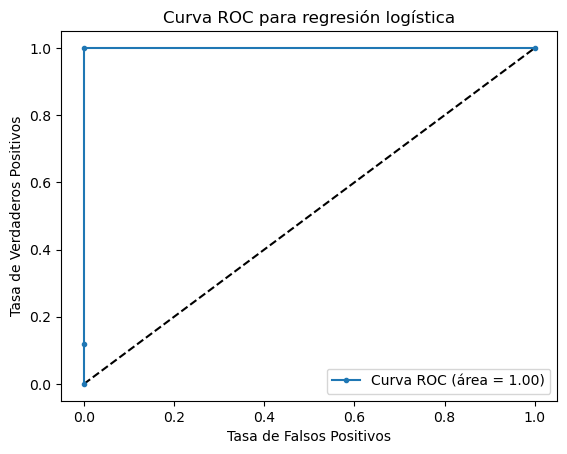

In [ ]:
# Graficación de la Curva ROC
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, marker='.', label='Curva ROC (área = %0.2f)' % auc)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.title('Curva ROC para regresión logística')
plt.show()

# Conclusiones
El solver newton-cg resultó ser el óptimo para el modelo de Regresión Logística, ya que arrojó un accuracy del 95% además de que en algunas categorías hizo una prediccion del 100% de efectividad. En la curva ROC como mencioné antes, tengo algunas dudas ya que no considero que el área bajo la curva sea de 1, pues no tuvimos resultados perfectos en el Reporte de Clasificación.